<font color=darkblue>**Telecom Churn Case Study**</font>

> Indented block




## Introduction

Predict churn est probablement l’une des applications les plus importantes de la science des
données dans le secteur commercial. Ce qui le rend populaire, c’est que ses effets sont plus tangibles
à comprendre et qu’il joue un rôle majeur dans les bénéfices globaux réalisés par l’entreprise.il est
considéré comme un bon moyen afin de créer des campagnes marketing pro-actives ciblées sur les
clients qui sont sur le point de se désabonner. Dans ce contexte , on a introduit notre projet
Télécommunications Churn qui sert à prédire les clients qui vont partir pour un autre concurrent,
afin que prendre des mesures nécessaires pour les conserver.


####Membres de l'équipe:

*   Nawres Boubakri
*   TIMOUMI Syrine
*   SAIDI Amine
*   FOUZAI Wifek
*   SAIDI Marouène
*   BEN HMIDA Nizar
*   SAOUDI Islem



In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import minimize,fmin_tnc

### I- Data Understanding

#### 1- Import dataset

In [ ]:
churn_data = pd.read_csv("TelcoChurn.csv")
churn_data.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0


In [ ]:
shape = churn_data.shape

In [ ]:
churn_data['employ'].unique().shape

(35,)

In [ ]:
churn_data['address'].unique().shape

(40,)

#### 3- Dataset features

In [ ]:
churn_data.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn'], dtype='object')

#### 4- Data values types

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tenure   200 non-null    float64
 1   age      200 non-null    float64
 2   address  200 non-null    float64
 3   income   200 non-null    float64
 4   ed       200 non-null    float64
 5   employ   200 non-null    float64
 6   equip    200 non-null    float64
 7   churn    200 non-null    float64
dtypes: float64(8)
memory usage: 12.6 KB


#### 5- Exploring all the values per feature

In [ ]:
for elem in churn_data.columns[1:]:
    print(churn_data[elem].value_counts())
    print("\n")

42.0    9
33.0    8
35.0    8
30.0    8
40.0    8
43.0    7
34.0    7
32.0    6
36.0    6
24.0    6
37.0    6
50.0    6
27.0    6
55.0    6
52.0    5
26.0    5
45.0    5
29.0    5
23.0    4
25.0    4
62.0    4
46.0    4
41.0    3
60.0    3
58.0    3
44.0    3
39.0    3
51.0    3
53.0    3
47.0    3
21.0    3
22.0    3
54.0    3
61.0    3
57.0    3
75.0    2
20.0    2
38.0    2
63.0    2
28.0    2
48.0    2
49.0    2
59.0    2
31.0    2
76.0    2
56.0    2
69.0    2
64.0    1
19.0    1
65.0    1
66.0    1
Name: age, dtype: int64


3.0     19
1.0     17
4.0     15
2.0     12
10.0    10
13.0     9
7.0      9
23.0     8
9.0      8
12.0     8
5.0      7
0.0      7
6.0      6
16.0     5
27.0     5
20.0     4
14.0     4
17.0     4
21.0     3
18.0     3
8.0      3
19.0     3
11.0     3
22.0     3
28.0     3
29.0     3
24.0     2
15.0     2
34.0     2
33.0     2
25.0     2
38.0     1
32.0     1
30.0     1
26.0     1
48.0     1
37.0     1
35.0     1
31.0     1
43.0     1
Name: address, dtype: in

#### Checking missing values

In [ ]:
churn_data.isna().sum()

tenure     0
age        0
address    0
income     0
ed         0
employ     0
equip      0
churn      0
dtype: int64

To better understand our dataset let's make an Explaratory Data Analysis

### EDA & Data Visualization

In [ ]:
churn_data.describe()

,tenure,age,address,income,ed,employ,equip,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000


##### Exploring the response variable, the Customers who churn or not

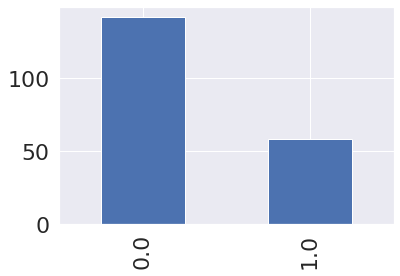

In [ ]:
churn_data['churn'].value_counts().plot(kind="bar")

By checking the barplot we notice that those who intend to leave a serive/product or even cut off their relationship with the Telco company are about 140 customers while those who are willing to continue using the company's products are about 60 customers. 

In [ ]:
##### Exploring the numerical features

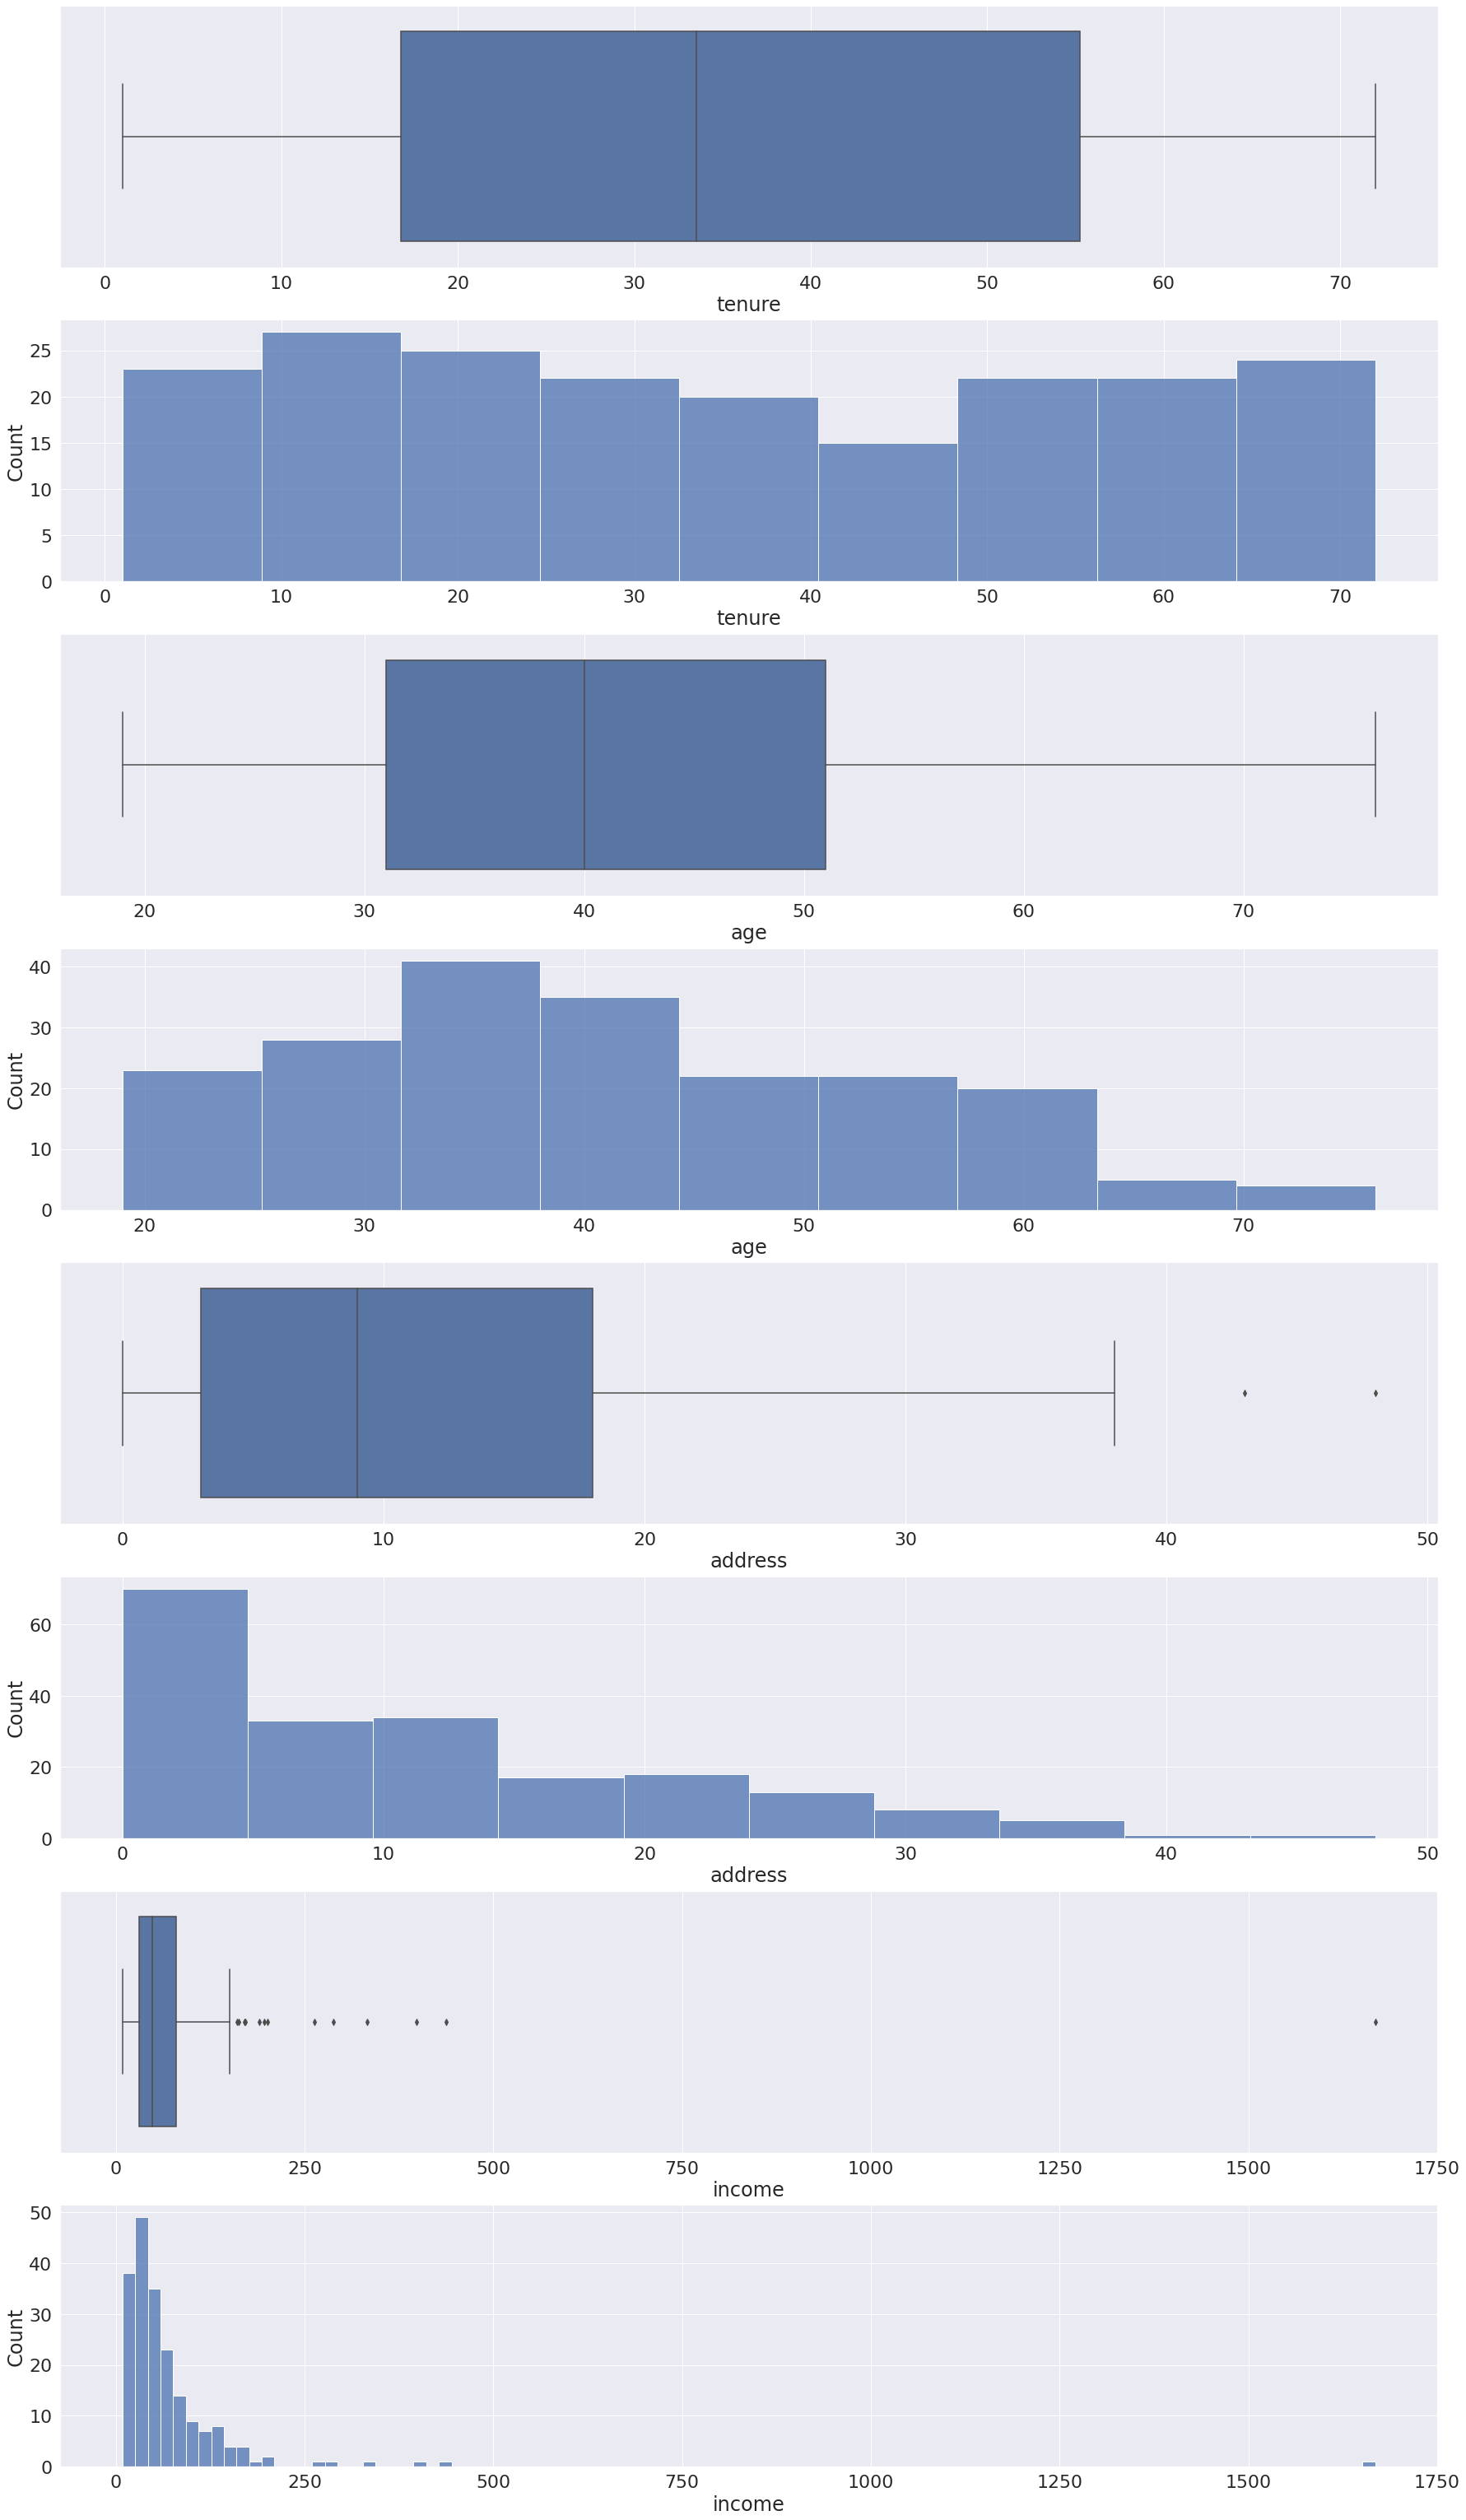

In [ ]:
fig, ax = plt.subplots(8, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=churn_data, x="tenure", ax=ax[0])
g=sns.histplot(data=churn_data, x="tenure", ax=ax[1])


g=sns.boxplot(data=churn_data, x="age", ax=ax[2])
g=sns.histplot(data=churn_data, x="age", ax=ax[3])


g=sns.boxplot(data=churn_data, x="address", ax=ax[4])
g=sns.histplot(data=churn_data, x="address", ax=ax[5])

g=sns.boxplot(data=churn_data, x="income", ax=ax[6])
g=sns.histplot(data=churn_data, x="income", ax=ax[7])

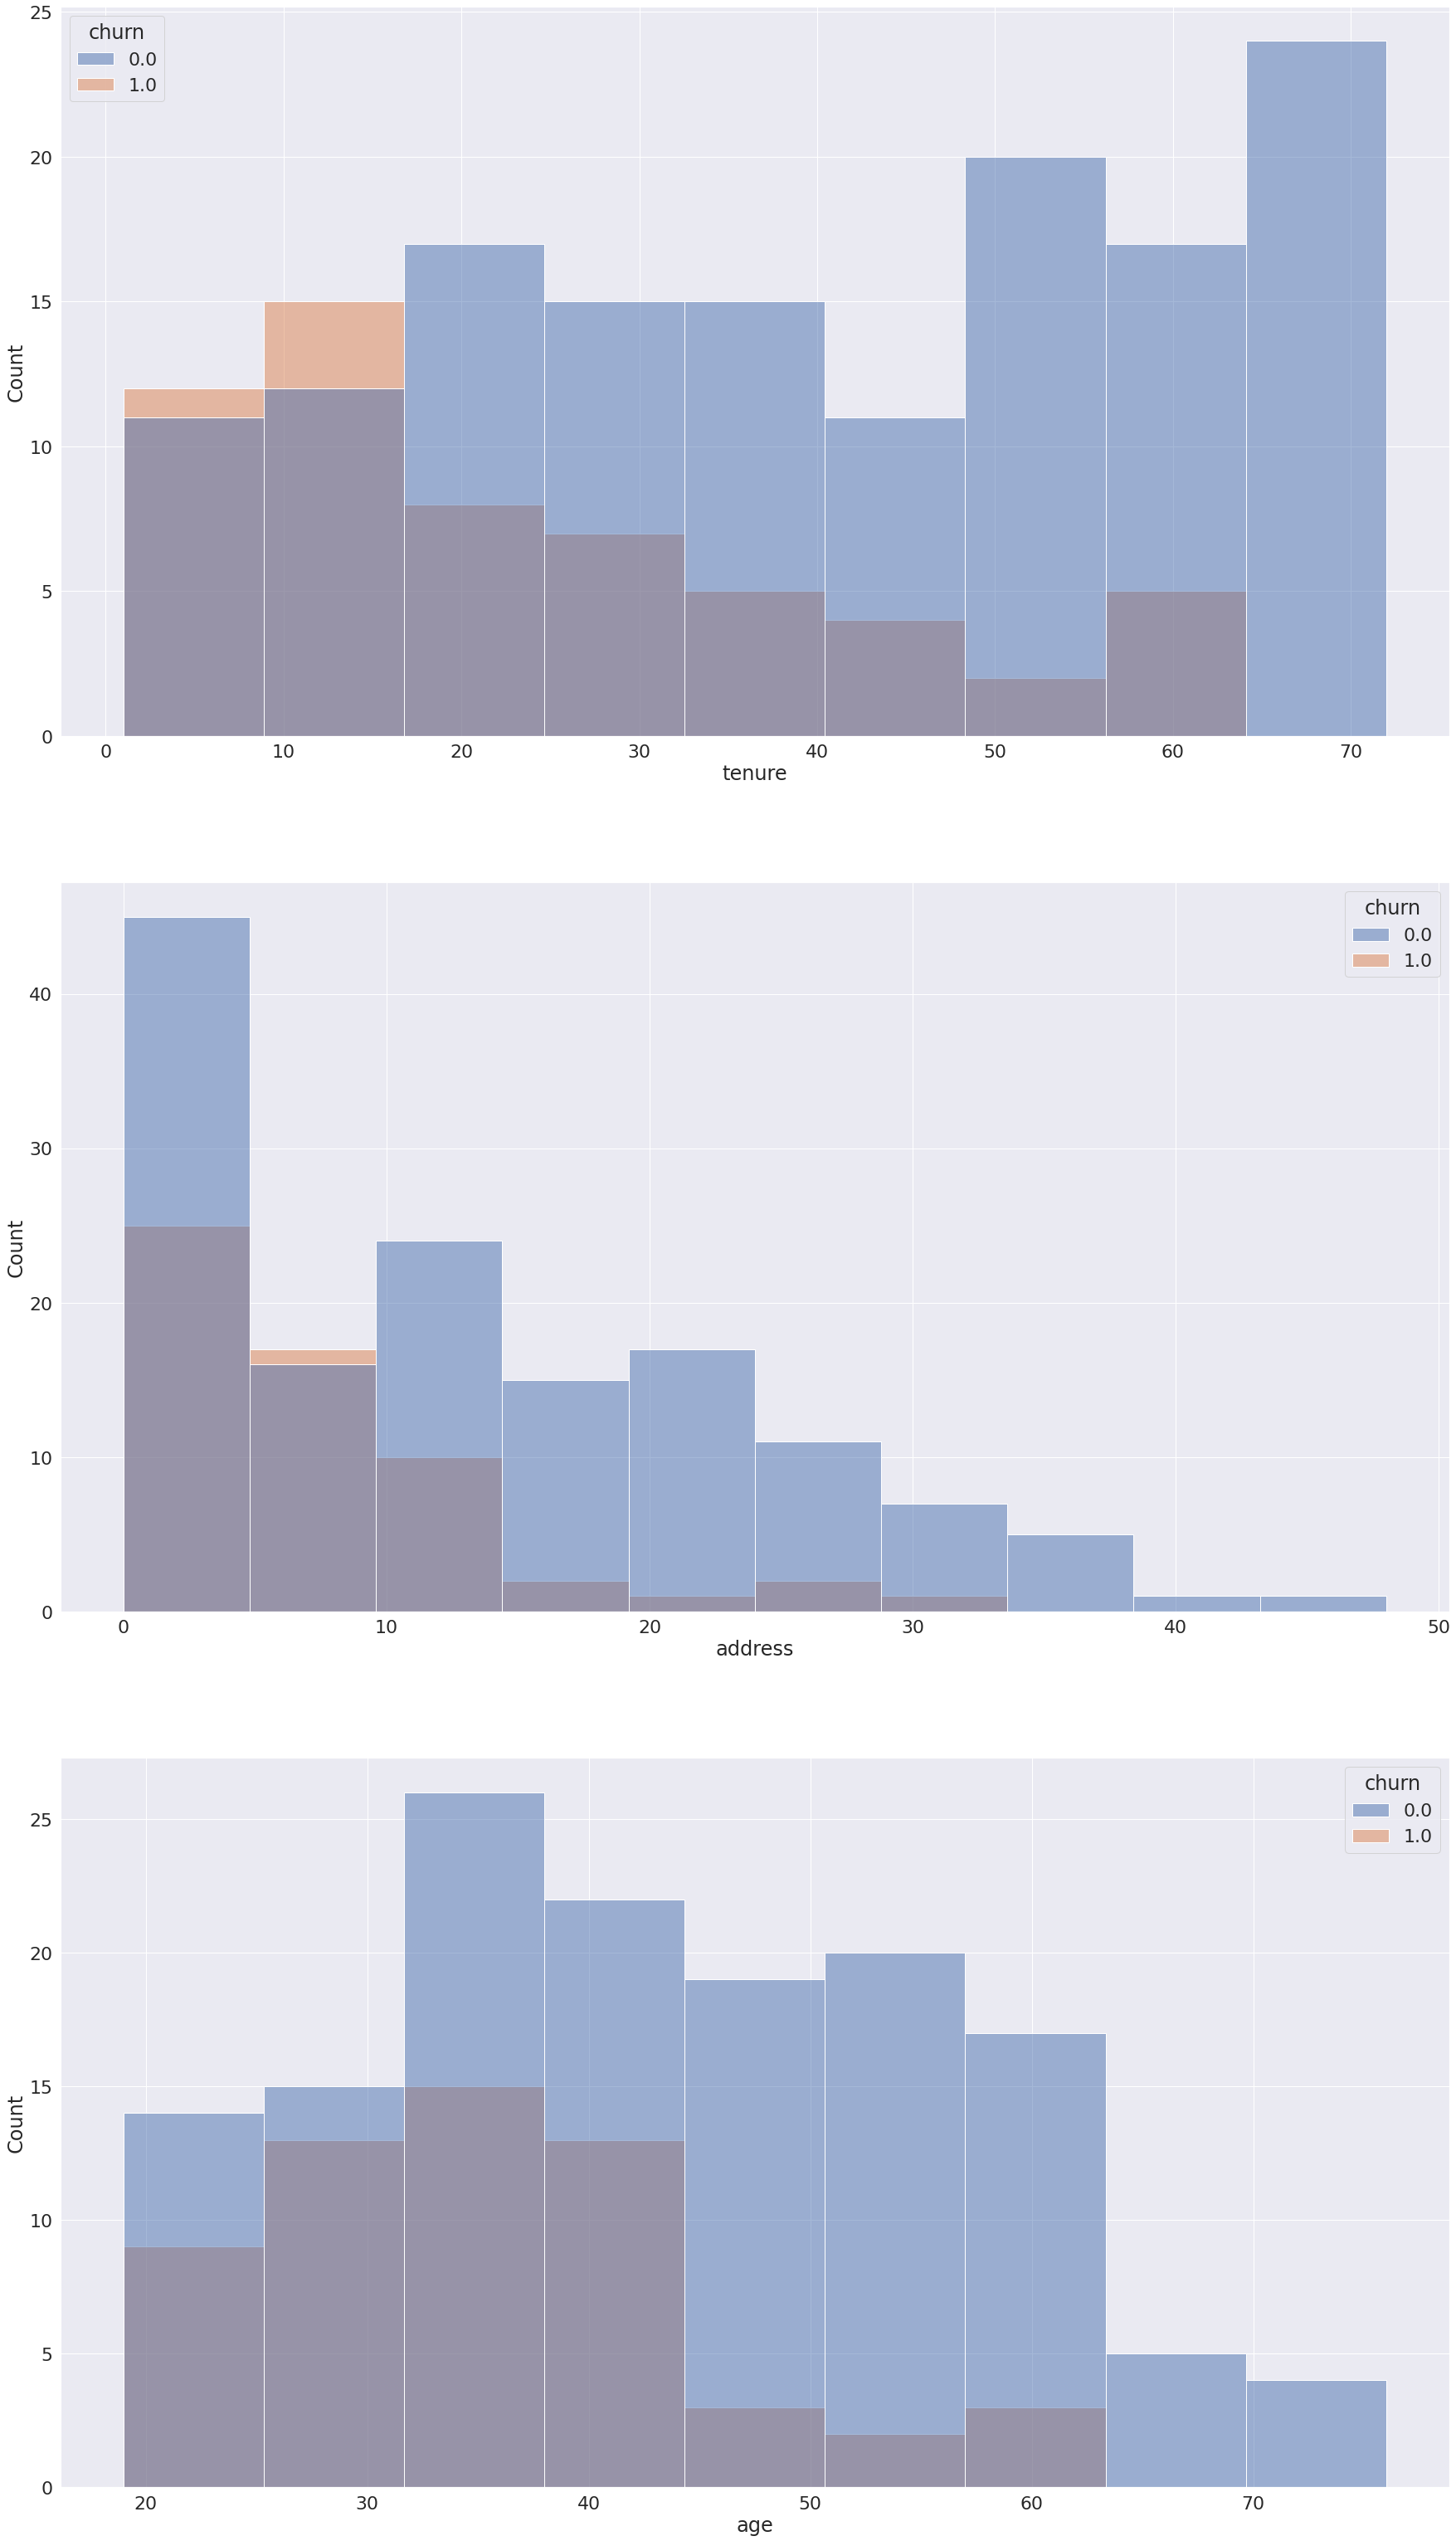

In [ ]:
fig2, ax2 = plt.subplots(3, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.histplot(data=churn_data, x="tenure", ax=ax2[0], hue="churn")
g=sns.histplot(data=churn_data, x="address", ax=ax2[1], hue="churn")
g=sns.histplot(data=churn_data, x="age", ax=ax2[2], hue="churn")

#### Visualizing Categorical features

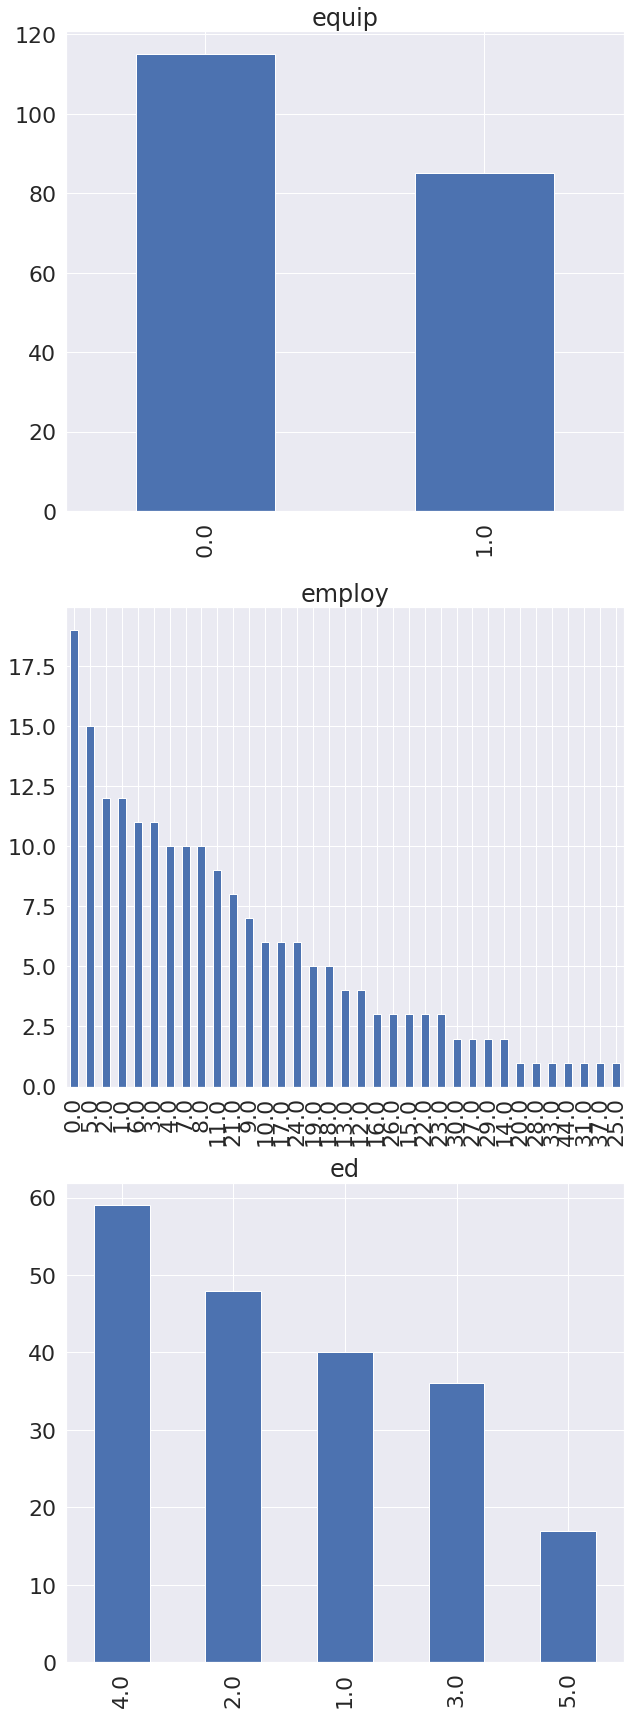

In [ ]:
categorical_variables = ['equip','employ','ed']

fig, ax = plt.subplots(len(categorical_variables), figsize=(10, 30))

for elem, i in zip(categorical_variables, range(len(categorical_variables))):
    
    churn_data[elem].value_counts().plot(kind='bar', ax=ax[i], title=elem)

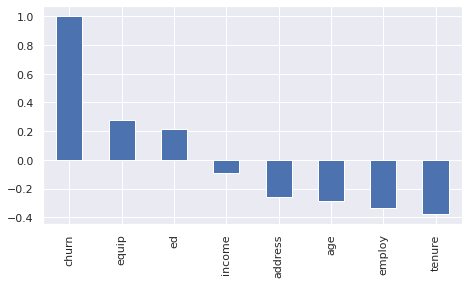

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(7.5,4))
churn_data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

#### Visualizing Correlation between features

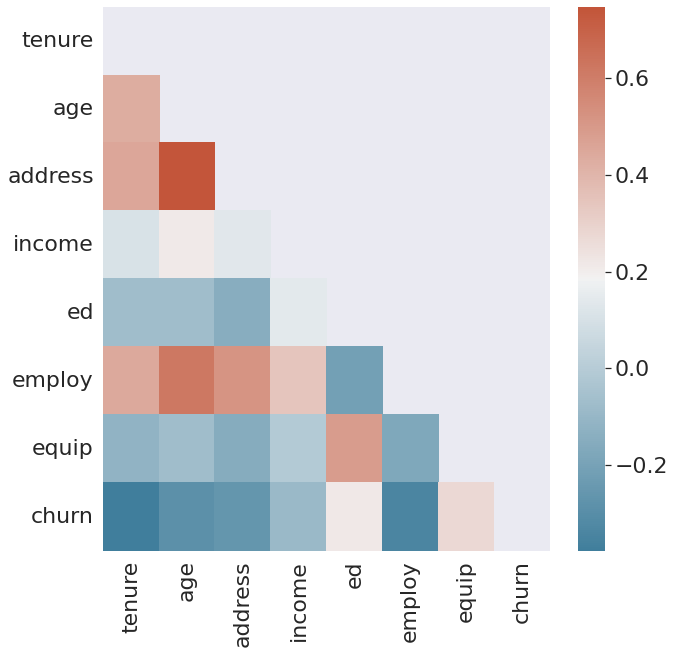

In [ ]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(churn_data.corr(), dtype=bool))
sns.heatmap(churn_data.corr(), mask=mask, cmap=cmap)

#### experimenting with basic sklearn LR model


In [ ]:
y = churn_data.iloc[:,-1].values
y

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
x =  churn_data.iloc[:,:-1].values
x.shape

(200, 7)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0).fit(x, y)

LR.predict(x[:2, :]) 
print("predicted value:",LR.score(x, y)) #training accuracy score

predicted value: 0.765


## Implementation of optimized logistic regression model from scratch

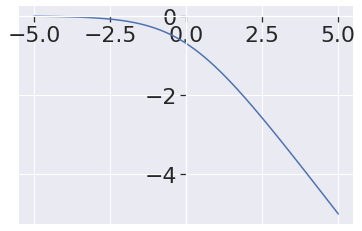

In [ ]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# sigmoid fct
def sigmoid(i):
    z = 1/(1 + np.exp(-i))
    return z

# z → log (1 − g(z))
y = np.log(1- sigmoid(x))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'b')
# show the plot
plt.show()

$log (1 − g(z))$ is not convexe as we can see through the graph

### Sigmoid Function implementation:

We will initialize the sigmoid function which will be the backbone of our logistic regression model

$g(z) = (1/1 + exp(z))$

In [ ]:
#fonction sigmoid
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
def hypothese(x,theta):
  return sigmoid(np.dot(x,theta.T))

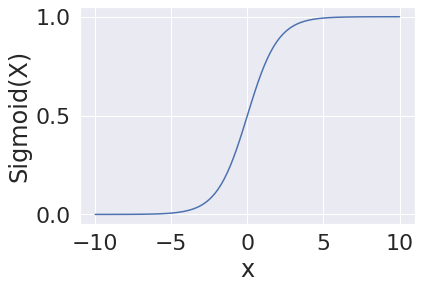

In [ ]:
x = np.linspace(-10, 10, 100)
z = sigmoid(x)
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")  
plt.show()

In [ ]:
a = np.array([1,2,3,4])
sigmoid(a)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379])

In [ ]:
m= np.array([[1, 2, 3], [4, 5, 6]])
m


array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
sigmoid(m)

array([[0.73105858, 0.88079708, 0.95257413],
       [0.98201379, 0.99330715, 0.99752738]])

In [ ]:
sigmoid(0)

0.5

## We will now implement our cost function  <br>
$J(\Theta)$ = -$\frac{1}{m} \Sigma_{i=1}^my^ilog(\hat{y}^i) + (1-y^i)log(1-\hat{y}^i)$

In [ ]:
def gradient(theta):
  return 1/m * np.dot(X.T, (hyp - y)) 

In [ ]:
def costFunction(theta, X, y):
   
    # Initialize some useful values
    m = y.size  # number of training examples
    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    hyp = hypothese(X,theta) 
    J =  1/m * np.sum((-y * np.log(hyp)) + (-(1 - y) * np.log(1 - hyp)))
    grad = 1/m * np.dot(X.T, (hyp - y)) 
    return J, grad



Now let's test  with a set of theta and display the gradient and the cost

In [ ]:
X

array([[ 1., 11., 33., ...,  5.,  5.,  0.],
       [ 1., 33., 33., ...,  2.,  0.,  0.],
       [ 1., 23., 30., ...,  1.,  2.,  0.],
       ...,
       [ 1.,  6., 32., ...,  1., 10.,  0.],
       [ 1., 24., 30., ...,  4.,  5.,  0.],
       [ 1., 61., 50., ...,  2., 22.,  1.]])

In [ ]:
X= churn_data.iloc[:, :7]
y= churn_data.iloc[:, 7]
m, n = X.shape
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)


theta_test = np.array([0.4, -0.033, -0.02, 0.003, -0.0002, 0.15, -0.023,2.])
cost, grad = costFunction(theta_test, X, y)
print('La fonction cout est : {:.3f}'.format(cost))
print('et les gradients attendus :')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))

La fonction cout est : 0.537
et les gradients attendus :
	[0.124, 4.355, 5.218, 1.350, 9.972, 0.404, 1.322]


Studying the coercivity of the cost function <br>
$\lim_{x \to \infty} J(\Theta) = \infty$ <br> and thus our cost function is coercive which entails the existence of at least one solution.


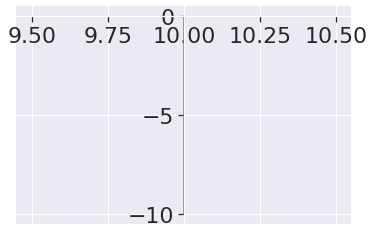

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(10,10,200)
J = 0
grad = np.zeros(x.shape)
hyp = sigmoid(x.T)
J_conv = (y * np.log(hyp)) + ((1 - y) * np.log(1 - hyp))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,J_conv, 'b')
# show the plot
plt.show()

As shown in the plot above, the cost function is not strictly convexe which entails that the solution is not unique.

Now let's implement our gradient descent function

In [ ]:

def gdescent(grad, theta, alfa, num_iter):
  m = len(theta)

  for i in range(num_iter):
    theta = theta - (alfa/m) * grad

  return theta

Further enhancing our gradient descent function to return the theta set and the costs

In [ ]:

def gdescent(X, y, theta, alfa, num_iter):
  m = len(theta)
  E = np.zeros((num_iter, len(theta)))
  C = np.zeros(num_iter)
  for i in range(num_iter):
    cost, grad = costFunction(theta, X, y)
    theta = theta - (alfa/m) * grad
    C[i] = cost
    E[i] = theta
  return C, E

In [ ]:
costs_gd, theta_gd = gdescent(X,y,np.zeros(8),0.01,200)

Now let's visualize the cost over 200 iterations

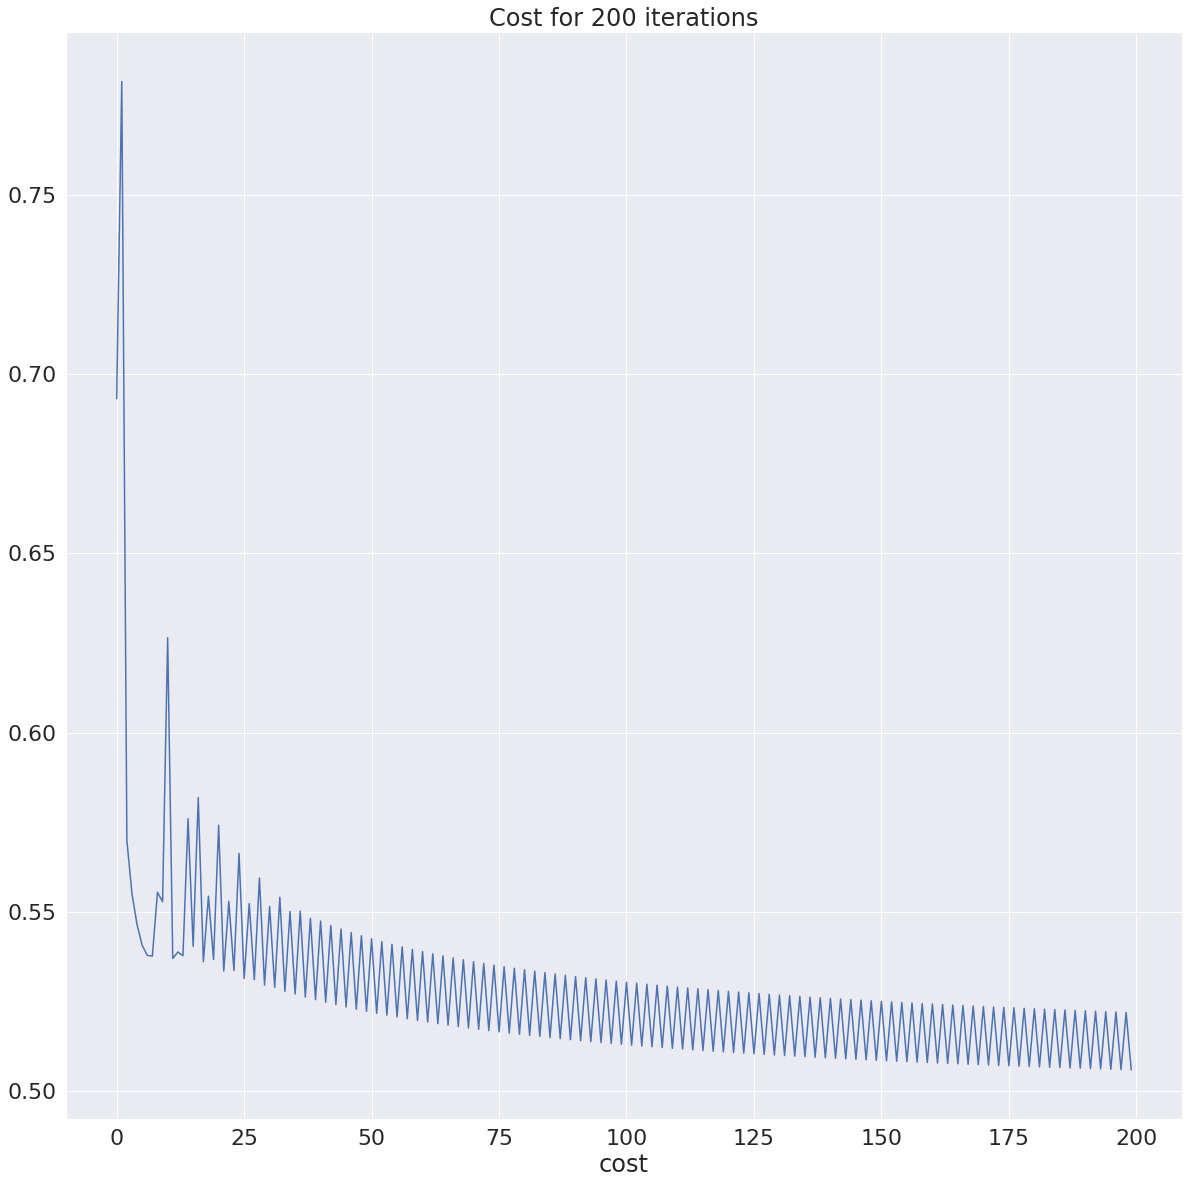

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(costs_gd)
plt.xlabel('cost')
plt.title("Cost for 200 iterations")
plt.show()

In our gradient descent we will be using the optimal learning rate, so let's begin by experimenting with different values and see the cost evolution

alpha 0.1:
the last thetas are [ 0.06636163 -0.32249801  0.07081295 -0.30011298 -0.47350253  0.41395414
 -0.52396729  0.15176318]


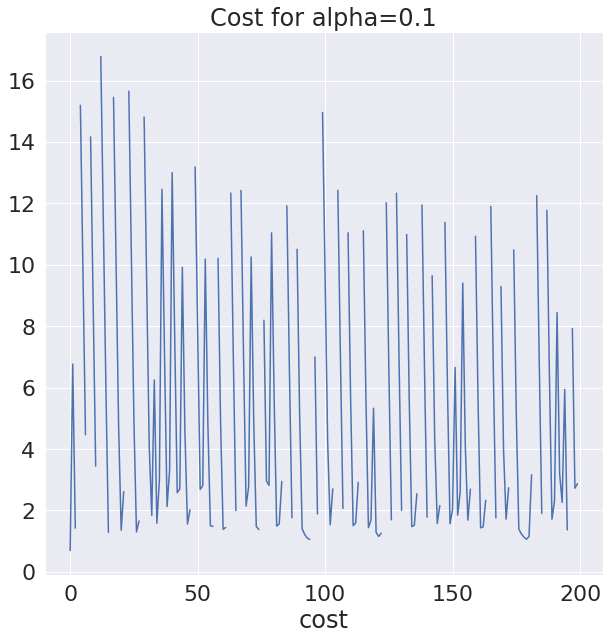

alpha 0.01:
the last thetas are [ 0.00501911 -0.03131197  0.0187451  -0.02679788 -0.0062769   0.03919254
 -0.06420882  0.01464479]


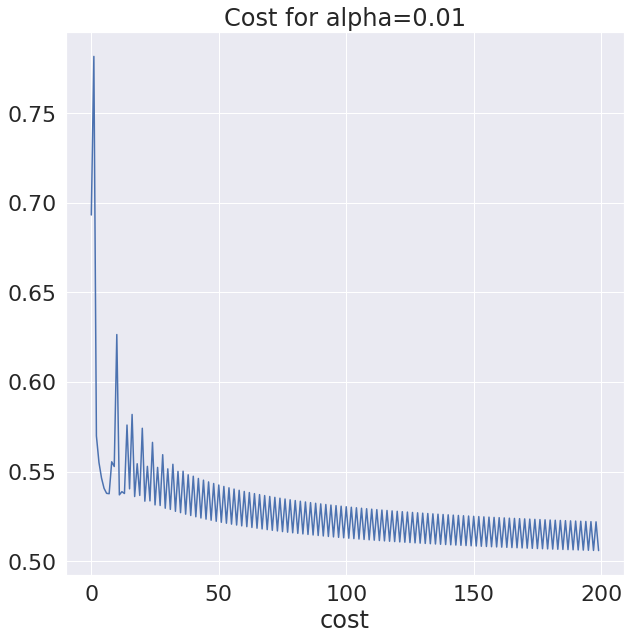

alpha 0.001:
the last thetas are [ 0.0005385  -0.02469423 -0.00033821 -0.00864977 -0.0002292   0.00444019
 -0.0146814   0.00162879]


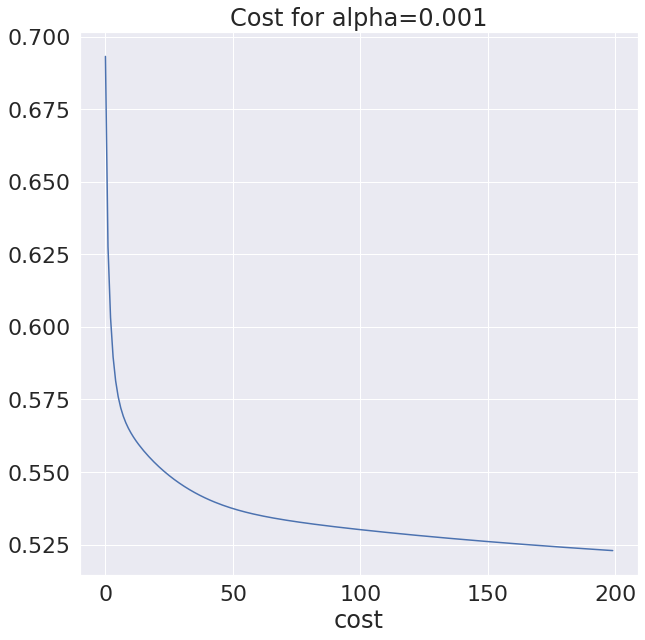

alpha 0.0001:
the last thetas are [-8.57333304e-05 -9.74861462e-03 -6.29396240e-03 -3.02583545e-03
 -4.57066655e-03  9.18177496e-05 -3.12002219e-03  1.15940668e-04]


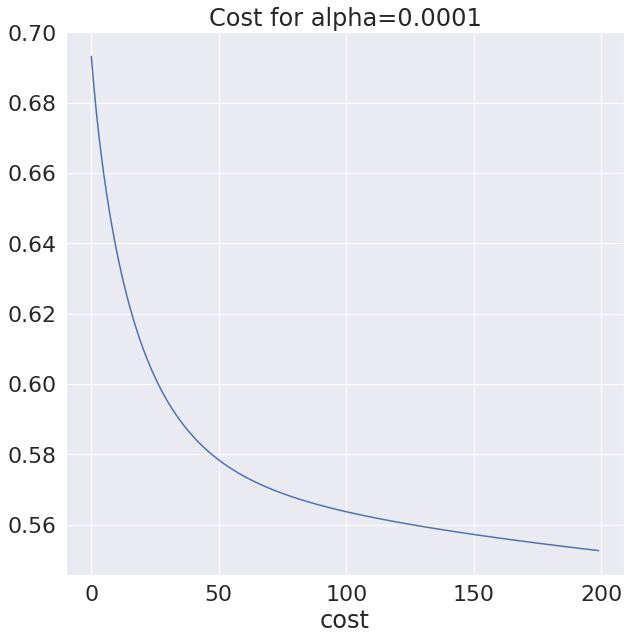

alpha 1e-05:
the last thetas are [-3.88360726e-05 -2.22527859e-03 -1.97029413e-03 -7.19836722e-04
 -3.11511838e-03 -7.66465949e-05 -6.90802919e-04 -1.12085594e-06]


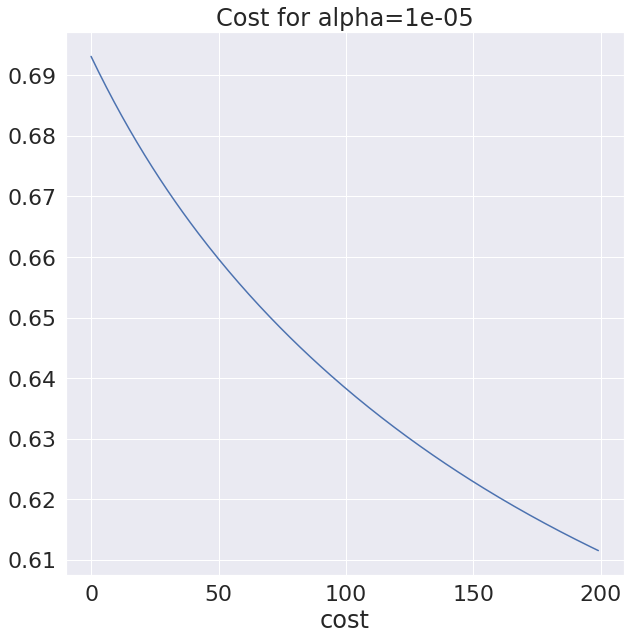

In [ ]:
alpha_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]
for i in range(len(alpha_list)):
  print("alpha {0}:".format(alpha_list[i]))
  costs_gd, theta_gd = gdescent(X,y,np.zeros(8),alpha_list[i],200)
  print("the last thetas are {0}".format(theta_gd[-1]))
  plt.figure(figsize=(10,10))
  plt.plot(costs_gd)
  plt.xlabel('cost')
  plt.title("Cost for alpha={0}".format(alpha_list[i]))
  plt.show()

As seen above the learning rate 0.001 has giving us almost the best cost covergence plot.

In the next section we will implement the optimized gradient descent function which will be behaving the same as the gradient descent yet with an optimized learning rate through each iteration with the learning schedule function.

In [ ]:
t0,t1 = 5,50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0/(t+t1)
def ogDescent(X, y, theta, num_iter):
  m = len(theta)
  E = np.zeros((num_iter, len(theta)))
  C = np.zeros(num_iter)
  alphas = np.zeros(num_iter)
  for i in range(num_iter):
    cost, grad = costFunction(theta, X, y)
    alpha = learning_schedule(i * len(y))
    alphas[i] = alpha
    theta = theta - alpha* grad
    C[i] = cost
    E[i] = theta
  return C, E, alphas

the last thetas are [ 0.0146981  -0.25478565  0.21243466 -0.09549515 -0.01578728  0.07157854
 -0.15413114  0.02065594]


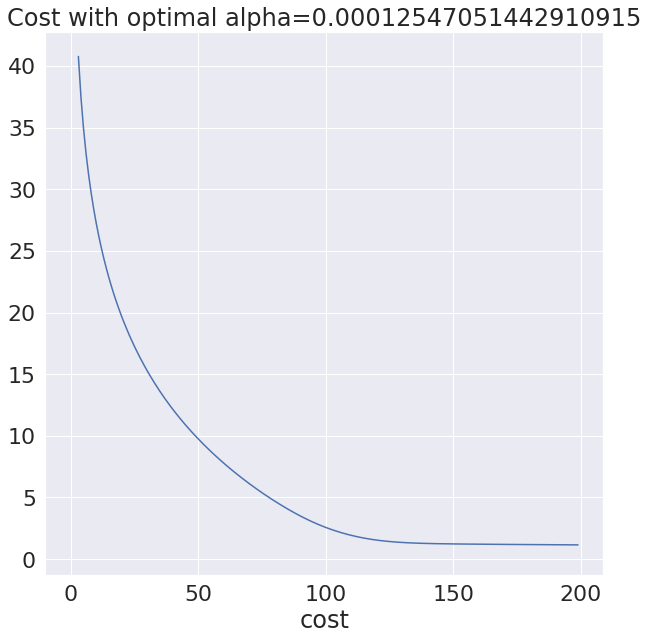

In [ ]:
costs_ogD, theta_ogD, alphas = ogDescent(X, y, np.zeros(8), 200)
print("the last thetas are {0}".format(theta_ogD[-1]))
plt.figure(figsize=(10,10))
plt.plot(costs_ogD)
plt.xlabel('cost')
plt.title("Cost with optimal alpha={0}".format(alphas[-1]))
plt.show()

as shown above that's the optimal learning rate value which a respectable convergance of cost over 200 iterations

Now we will experiment with Batch gradient descent, Mini batch gradient descent and Stochastic gradient descent

In [ ]:
def batch_gradient_descent(X,Y,theta,alpha,iters):
    cost_history = [0] * iters  # initalize our cost history list
    for i in range(iters):         
        prediction = np.dot(X,theta.T)               
        theta = theta - (alpha/len(Y)) * np.dot(prediction - Y,X)   
        cost_history[i] = costFunction(theta,X,Y)               
    return theta

In [ ]:
theta_bgD = batch_gradient_descent(X,y, np.zeros(8), 0.01, 5)
print(theta_bgD)

[2.01654958e+06 8.07849343e+07 9.23185032e+07 2.83219485e+07
 5.26217041e+08 6.20539277e+06 3.03121579e+07 8.33627716e+05]


In [ ]:
t0,t1 = 5,50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0/(t+t1)
def stochastic_gradient_descent(X,y,thetas,n_epochs=30):
    c_hist = [0] * n_epochs # Cost history list
    for epoch in range(n_epochs):
        for i in range(len(y)):
            random_index = np.random.randint(len(y))
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            prediction = xi.dot(thetas)
            
            _, gradient = costFunction(thetas,xi,yi)
            eta = learning_schedule(epoch * len(y) + i)
            thetas = thetas - eta * gradient
            c_hist[epoch] = costFunction(thetas,xi,yi)
    return thetas


In [ ]:
thetas_sgD = stochastic_gradient_descent(X,y,np.zeros(8))
print(thetas_sgD)

[ 0.4647407  -0.28025192 -0.07393154  0.00758979 -0.24637664  3.04049386
 -0.29548139  0.66930222]


In [ ]:
np.random.seed(42) # so we get equal results
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)
def mini_batch_gradient_descent(X,y,thetas,n_iters=100,batch_size=20):
    t = 0
    c_hist = [0] * n_iters
    grad = 0
    for epoch in range(n_iters):
        shuffled_indices = np.random.permutation(len(y))
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0,len(y),batch_size):
            t+=1
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]

            gradient = 2/batch_size * np.dot(xi.T, (hypothese(xi,thetas) - yi))
            eta = learning_schedule(t)
            thetas = thetas - eta * gradient
            c_hist[epoch] = costFunction(thetas,xi,yi)
    return thetas

In [ ]:
thetas_mb_gd = mini_batch_gradient_descent(X,y,theta_test)
print(thetas_mb_gd)

[ 5.57565244 -3.79755196  1.14857443 -3.72142647 -1.27597032 34.45526145
 -8.99457579 16.30853503]


We will now implement the maximize minimize function to benchmark further on all of the optimized weights that we have extracted and choose the optimal one.

In [ ]:

def fit(x, y, theta):
  opt_weights = minimize(costFunction, x0=theta, jac=True, method='TNC', options ={'maxiter' : 400}, args=(x, y))
    
  return opt_weights['x']

In [ ]:
theta_sc = fit(X,y,np.zeros(8))

In [ ]:
print(theta_sc)

[ 3.98014838e-01 -3.64555779e-02 -2.11218600e-02  5.76461703e-03
 -3.75703814e-04  2.00996998e-01 -5.96229461e-02  1.01186556e+00]


In [ ]:
print("\n gD: {0} \n ogD: {1} \n sgD: {2} \n mb_gd: {3} \n sc: {4}".format(theta_gd[-1].sum(), theta_ogD[-1].sum(), thetas_sgD.sum(), thetas_mb_gd.sum(), theta_sc.sum()))


 gD: -0.008837934261403974 
 ogD: -0.2008319784124259 
 sgD: 3.2860850809212483 
 mb_gd: 39.69849881382825 
 sc: 1.4990659230889416


The closest ${θ}$ to ${θ}_{sc}$ is the ${θ}_{ogD}$. <br> Thus these are the weights that we will be choosing for our final model

## Evalutation 




Now we will test our model compared to the classic logistic regression from the sklearn library, fit them both with the same data and pass the same test_set and compare with the precision metric.

In [ ]:
test_set = np.array([1.0,24.0,30.0,12.0,31.0,0.0,2.0,1.0])

In [ ]:
def predict(X, theta):
    a = sigmoid(np.matmul(X, theta))
    print("sigmoid output is {0}".format(a))
    pred = 0
    if a > 0.5:
      pred = 1
    else:
      pred = 0
    return pred

In [ ]:
a = predict(test_set, theta_ogD[-1])

sigmoid output is 0.16109927714963015


In [ ]:
print("the predicted label is {0}".format(a))

the predicted label is 0


In [ ]:
data_sample=churn_data.sample(40)

In [ ]:
test_data = np.concatenate([np.ones((data_sample.shape[0], 1)), data_sample.iloc[:,:-1].values], axis=1)
test_truth = data_sample.iloc[:,-1].values

In [ ]:
preds = [predict(x,theta_ogD[-1]) for x in test_data]

sigmoid output is 0.005698414770727441
sigmoid output is 0.9997771062304016
sigmoid output is 0.7092496546895348
sigmoid output is 0.4048173780834102
sigmoid output is 0.0050327112568395345
sigmoid output is 3.467906568650365e-07
sigmoid output is 0.1430835359835014
sigmoid output is 0.9048491523716944
sigmoid output is 0.9724817866759817
sigmoid output is 0.0006174701887274786
sigmoid output is 0.0006802379272283811
sigmoid output is 0.00036643865054926096
sigmoid output is 0.8881309224441754
sigmoid output is 0.00012597265205394623
sigmoid output is 0.000544509662420794
sigmoid output is 0.013402639744471813
sigmoid output is 0.6896496672924282
sigmoid output is 0.25614267589668155
sigmoid output is 0.8260929118284708
sigmoid output is 1.9040854760873682e-07
sigmoid output is 0.0003408632910087774
sigmoid output is 0.729897073986811
sigmoid output is 0.8050646863935715
sigmoid output is 3.175407191597461e-06
sigmoid output is 8.989952782330092e-05
sigmoid output is 0.9735504934436419

In [ ]:
preds

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

Calculating the confusion matrix

In [ ]:
def confusion_matrix(test_truth,test_pred):
  TN = 0
  TP = 0
  FN = 0
  FP = 0
  for i in range(len(test_truth)):
    if (float(test_truth[i]) == float(test_pred[i])):
      if( float(test_truth[i]) == 0 ):
        TP+=1
      else:
        TN+=1
    else:
      if( float(test_truth[i]) == 0 ):
        FP+=1
      else:
        FN+=1
  return TN,TP,FN,FP

In [ ]:
def precision_calculus(test_truth,test_pred):
  TN,TP,FN,FP = confusion_matrix(test_truth,test_pred)
  return (TP/(TP+FP))

In [ ]:
precision = precision_calculus(test_truth,preds)

In [ ]:
precision

0.8076923076923077

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score 
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(test_data)
precision2 = precision_score(test_truth,predicted_classes)
parameters = model.coef_
print(precision2)

0.7


As seen above, the precision of our manually customized model is greater than  the precision obtained from the sklearn logistic regression model